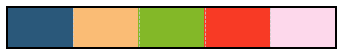

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.polynomial as poly
import seaborn as sns
import re
import os
import json
import re
import jsonpickle
import sys
import graphviz
import glob
from statistics import mean, stdev, median
sys.path.append(r'..')

output_dir = os.path.join(os.path.expanduser("~"), "repos/ei-paper/figs")
# data_dir = os.path.join(os.path.expanduser("~"), "repos/cloudlab/results-JQF/merged")
# EI data
# data_dir = os.path.join(os.path.expanduser("~"), "/usr0/home/aoli/repos/cloudlab/results-JQF/ei-48h-12-12/")
%load_ext autoreload
%autoreload 2
import sns_configs
from process_data import identify_algorithms

# Mix Data


In [2]:
data_dirs = [
    # os.path.join(os.path.expanduser("~"), "/data/aoli/results-JQF/ei-d430")
    # os.path.join(os.path.expanduser("~"), "/data/aoli/results-JQF/ei-d430"),
    # os.path.join(os.path.expanduser("~"), "/data/aoli/results-JQF/ei-d430-mix"),
    # os.path.join(os.path.expanduser("~"), "/data/aoli/results-JQF/ei-d430-jython"),
    os.path.join(os.path.expanduser("~"), "/data/aoli/results-JQF/ei-d430-reverse"),
]
output_dir = os.path.join(os.path.expanduser("~"), data_dirs[0], "fig")
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

algorithms = identify_algorithms(data_dirs)
print("Identified algorithms: ", algorithms)

from process_data import generate_cov_table, visualize_cov_distribution

print(algorithms)
result = generate_cov_table(data_dirs, sorted(algorithms), output_dir)
visualize_cov_distribution(output_dir, result)


## JGraph- algorithms / check generator.


Identified algorithms:  {'zest-testWithReversedGenerator', 'mix-testWithReversedGenerator', 'ei-testWithReversedGenerator'}
{'zest-testWithReversedGenerator', 'mix-testWithReversedGenerator', 'ei-testWithReversedGenerator'}


KeyError: 'ei-testWithReversedGenerator'

In [4]:
from process_data import generate_graph

generate_graph(data_dirs, algorithms, output_dir)

zest-testWithReversedGenerator


FileNotFoundError: [Errno 2] No such file or directory: '/data/aoli/results-JQF/ei-d430-reverse/rhino-zest-testWithReversedGenerator-results-0/results.csv'

In [41]:
from process_data import generate_corpus_exec_time, generate_perf_graph

generate_perf_graph(data_dirs, algorithms, output_dir, "exec_time")

<Figure size 288x216 with 0 Axes>

In [5]:

from process_data import generate_corpus_exec_time, generate_perf_graph


data_dir = os.path.join(os.path.expanduser("~"), "repos/cloudlab/results-JQF/ei-48h-11-22-p")
generate_perf_graph(data_dir, algorithms, output_dir, "perf")

<Figure size 432x216 with 0 Axes>

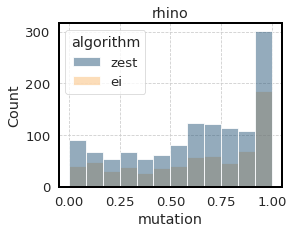

In [8]:
from process_data import parse_and_visualize_mutation_data

parse_and_visualize_mutation_data("/data/aoli/results-JQF/log-mutation/", True)

ant
maven
bcel
rhino


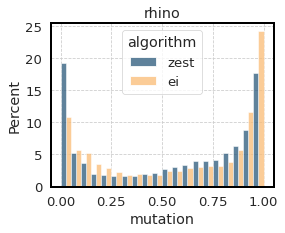

closure


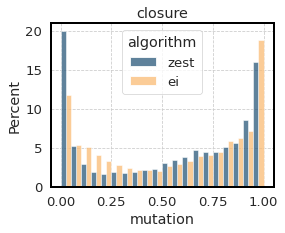

chocopy


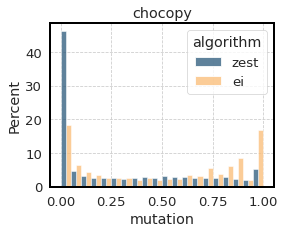

gson


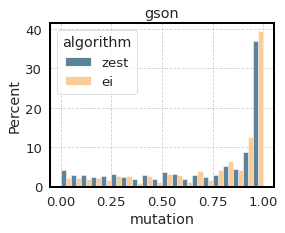

jackson
jython


In [18]:
from process_data import parse_and_visualize_mutation_data

parse_and_visualize_mutation_data("/data/aoli/results-JQF/log-mutation/", False)